In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df_2010 = pd.read_excel('online_retail.xlsx', sheet_name = 0)

In [3]:
df_2010.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df_2010.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


### Initial Insights from Dataset

#### Dataset Overview
- The dataset contains 525,461 entries with 8 columns, capturing online retail transactions from 2009-12-01 to 2010-12-09.
- Key columns include `Invoice`, `StockCode`, `Description`, `Quantity`, `InvoiceDate`, `Price`, `Customer ID`, and `Country`.

#### Data Summary
- **Head Summary**:
  - The `head()` function shows sample rows, indicating characteristic transactions with multiple units per invoice and varying product prices.
  - All sample entries are from the "United Kingdom," pointing to the primary market in this subset.

- **Information**:
  - `info()` indicates no missing values in most fields, but `Customer ID` has notable gaps (missing for 107,927 transactions), suggesting potential issues for customer-specific analyses.
  - Data types are appropriate for analysis, with `InvoiceDate` as datetime and numerical fields for `Quantity` and `Price`.

- **Descriptive Statistics**:
  - The `describe()` function highlights key statistics:
    - **Quantity**: Ranges widely with some negative values, suggesting returns or data entry errors.
    - **Price**: Also has negative entries, indicating potential data issues.
    - **Customer ID**: Skewed distribution with outliers, suggesting diverse purchasing power among customers.

#### Key Observations
- There are potential data quality issues with negative values in `Quantity` and `Price`, which need handling to ensure accurate analysis.
- Missing `Customer ID` values affect personalization and customer segmentation efforts.
- Understanding these initial insights is crucial for effective data cleaning, transformation, and further analysis.

These insights provide a foundational understanding of the dataset’s structure and potential challenges.

In [6]:
df_2010[df_2010['Customer ID'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [7]:
df_2010['Customer ID'].nunique()

4383

In [8]:
df_2010[df_2010['Quantity'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [9]:
# Ensure the 'Invoice' column is of type string to allow for string operations like regex matching
df_2010["Invoice"] = df_2010["Invoice"].astype(str)

# Filter and display rows where the 'Invoice' column does not match the pattern of exactly 6 digits
# The regex pattern '^\d{6}$' ensures that the invoice number is exactly 6 digits long
df_2010[df_2010["Invoice"].str.match("^\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [10]:
# Obtain the unique non-numeric characters remaining in the 'Invoice' column 
# after removing all numeric digits using regex
df_2010["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [11]:
# Filter and display rows from df_2010 where the 'Invoice' column starts with the letter 'A'
# This can help identify specific types of transactions or special invoice categories
df_2010[df_2010["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [12]:
df_2010['StockCode'].nunique()

4632

In [13]:
# Convert the 'StockCode' column to string type to enable string operations like regex matching
df_2010["StockCode"] = df_2010["StockCode"].astype(str)

# Filter and display rows where the 'StockCode' does not match the pattern of exactly 5 digits
# The regex pattern '^\d{5}$' is used to ensure stock codes are exactly 5 digits long
df_2010[df_2010["StockCode"].str.match("^\d{5}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [14]:
# Identify unique 'StockCode' values that do not match standard patterns
# The line checks for codes that don't follow the pattern of exactly 5 digits 
# followed optionally by one or more letters, or just 5 digits

# Filter 'StockCode' entries that do not match either of these patterns:
# 1. '^\\d{5}[a-zA-Z]+$': A regex pattern for a sequence of exactly 5 digits followed by one or more alphabetic characters
# 2. '^\\d{5}$': A regex pattern for exactly 5 digits

# The unique() function then outputs distinct non-conforming stock code patterns

df_2010[
    (df_2010["StockCode"].str.match("^\d{5}[a-zA-Z]+$") == False) &  # Does not match 5 digits followed by letters
    (df_2010["StockCode"].str.match("^\d{5}$") == False)             # Does not match exactly 5 digits
]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [15]:
# Filter the 'df_2010' DataFrame for entries where 'StockCode' starts with "POST"
# Use the regex pattern '^POST', which matches any string starting with 'POST'
# Apply value_counts() to count the occurrence of each unique row that matches these criteria

df_2010[df_2010["StockCode"].str.match("^POST") == True].value_counts()

Invoice  StockCode  Description  Quantity  InvoiceDate          Price  Customer ID  Country       
489439   POST       POSTAGE       3        2009-12-01 09:28:00  18.00  12682.0      France            1
527123   POST       POSTAGE       4        2010-10-14 19:39:00  18.00  12694.0      France            1
526715   POST       POSTAGE       3        2010-10-12 16:40:00  40.00  12629.0      Sweden            1
526717   POST       POSTAGE       2        2010-10-12 16:51:00  1.00   12605.0      Germany           1
526853   POST       POSTAGE       5        2010-10-13 12:48:00  28.00  12540.0      Spain             1
                                                                                                     ..
510651   POST       POSTAGE       1        2010-06-02 13:34:00  18.00  12437.0      France            1
510660   POST       POSTAGE       1        2010-06-02 14:30:00  18.00  12677.0      France            1
510668   POST       POSTAGE       2        2010-06-02 15:03:00  17.00

In [16]:
# Filter the 'df_2010' DataFrame to select rows where the 'StockCode' consists solely of alphabetic characters
# The regex pattern '^[a-zA-Z]+$' matches strings that are entirely composed of one or more letters
df_2010[df_2010["StockCode"].str.contains("^[a-zA-Z]+$")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.0,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


Stock Code

StockCode is meant to follow the pattern [0-9]{5} but seems to have legit values for [0-9]{5}[a-zA-Z]+
Also contains other values: | Code | Description | Action | 
DCGS | Looks valid, some quantities are negative though and customer ID is null | Exclude from clustering | | D | Looks valid, represents discount values | Exclude from clustering | | DOT | Looks valid, represents postage charges | Exclude from clustering | | M or m | Looks valid, represents manual transactions | Exclude from clustering | | C2 | Carriage transaction - not sure what this means | Exclude from clustering | | C3 | Not sure, only 1 transaction | Exclude | | BANK CHARGES or B | Bank charges | Exclude from clustering | | S | Samples sent to customer | Exclude from clustering | | TESTXXX | Testing data, not valid | Exclude from clustering | | gift__XXX | Purchases with gift cards, might be interesting for another analysis, but no customer data | Exclude | | PADS | Looks like a legit stock code for padding | Include | | SP1002 | Looks like a special request item, only 2 transactions, 3 look legit, 1 has 0 pricing | Exclude for now| | AMAZONFEE | Looks like fees for Amazon shipping or something | Exclude for now | | ADJUSTX | Looks like manual account adjustments by admins | Exclude for now |

DATA CLEANING

In [17]:
cleaned_df_2010 = df_2010.copy()

In [18]:
# Convert the 'Invoice' column in the 'cleaned_df_2010' DataFrame to string type
# This ensures that string-based operations, like regex matching, can be performed
cleaned_df_2010["Invoice"] = cleaned_df_2010["Invoice"].astype(str)

# Create a mask for filtering invoices that match exactly 6 digits
# The regex pattern '^\d{6}$' ensures that the invoice is exactly 6 digits long
mask = (
    cleaned_df_2010['Invoice'].str.match("^\d{6}$") == True
)

# Apply the mask to filter the DataFrame, retaining only rows with valid 6-digit invoices
cleaned_df_2010 = cleaned_df_2010[mask]

# Display the cleaned DataFrame, now containing only rows with properly formatted invoice numbers
cleaned_df_2010

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [19]:
# Convert the 'StockCode' column in 'cleaned_df_2010' to string type
# This is necessary for performing string operations like regex matching
cleaned_df_2010['StockCode'] = cleaned_df_2010['StockCode'].astype(str)

# Create a mask for filtering valid 'StockCode' entries
mask = (
    # Match stock codes that are exactly 5 digits
    (cleaned_df_2010['StockCode'].str.match("^\d{5}$") == True) |
    
    # Match stock codes that exactly match the string 'PADS'
    (cleaned_df_2010['StockCode'].str.match("^PADS$") == True) |
    
    # Match stock codes that have 5 digits followed by at least one letter
    (cleaned_df_2010['StockCode'].str.match("^\d{5}[a-zA-Z]") == True)
)

# Filter the DataFrame using the mask, keeping only rows that match any of the specified 'StockCode' patterns
cleaned_df_2010 = cleaned_df_2010[mask]

# Display the cleaned DataFrame, now containing only rows with valid 'StockCode' formats
cleaned_df_2010

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [20]:
# Remove rows from 'cleaned_df_2010' where the 'Customer ID' column has missing values
# - 'dropna()' with 'subset=['Customer ID']' targets rows lacking this specific identifier
# - 'inplace=True' modifies the DataFrame directly, without creating a copy

cleaned_df_2010.dropna(subset=['Customer ID'], inplace=True)

# Reasons for removing rows with missing 'Customer ID':
# - **Data Integrity**: Ensures that all remaining rows have complete customer information, which is vital for accurate analysis.
# - **Analysis Accuracy**: Customer-specific analyses (e.g., segmentation, behavior analysis) require a valid 'Customer ID' to ensure accuracy.
# - **Avoidance of Errors**: Operations that involve grouping, merging, or aggregating by 'Customer ID' can result in errors or misinterpretations if missing values are present.
# - **Meaningful Metrics**: Metrics that depend on customer data (like frequency of purchases, total spend per customer) are meaningful only with complete data.

/var/folders/cl/y3npqsz9383g_6r1rjj5338r0000gn/T/ipykernel_78714/1019643649.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_2010.dropna(subset=['Customer ID'], inplace=True)


In [21]:
cleaned_df_2010.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


In [22]:
len(cleaned_df_2010[cleaned_df_2010['Price'] == 0])

28

In [23]:
# Filter 'cleaned_df_2010' to include only rows where 'Price' is greater than 0
# This cleans the dataset by removing entries with non-positive prices,
# which may represent errors or placeholder values that are not valid for analysis

cleaned_df_2010 = cleaned_df_2010[cleaned_df_2010['Price'] > 0]

# Reasons for removing rows with non-positive prices:
# - **Data Validity**: A non-positive price can indicate errors in data entry or issues with transaction records (e.g., returns, errors).
# - **Logical Consistency**: Products generally cannot be sold for zero or negative prices, so such entries are logically inconsistent.
# - **Analysis Integrity**: Ensuring all entries have valid prices helps maintain the integrity of any financial analysis, such as revenue calculations or pricing strategy assessments.

In [24]:
cleaned_df_2010.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.000000,406309,406309.000000,406309.000000
mean,13.617924,2010-07-01 10:14:25.869572352,2.991668,15373.722268
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14006.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,96.998833,NaN,4.285951,1677.329470


In [25]:
# Calculate the proportion of records retained in 'cleaned_df_2010' compared to the original 'df_2010'
# This provides insight into how much data was removed during the cleaning process
len(cleaned_df_2010) / len(df_2010)

# Interpretation:
# Dropped around 23% of records:
# Around 23% of records were dropped during cleaning due to issues such as missing Customer ID, non-positive prices, or invalid stock/invoice formats.

0.7732429238325965

Dropped 23% records

**FEATURE ENGINEERING**

In [26]:
# Calculate the total sales value for each transaction line and store it in a new column 'SalesLineTotal'
# This is done by multiplying the 'Quantity' of items by the 'Price' per item
cleaned_df_2010['SalesLineTotal'] = cleaned_df_2010['Quantity'] * cleaned_df_2010['Price']

# Display the updated DataFrame, which now includes the 'SalesLineTotal' column
cleaned_df_2010

/var/folders/cl/y3npqsz9383g_6r1rjj5338r0000gn/T/ipykernel_78714/4203801018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_2010['SalesLineTotal'] = cleaned_df_2010['Quantity'] * cleaned_df_2010['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [27]:
# Group the 'cleaned_df_2010' DataFrame by 'Customer ID' to perform aggregation
aggregated_df_2010 = cleaned_df_2010.groupby('Customer ID', as_index=False).agg(
    # Calculate the total monetary value for each customer as the sum of 'SalesLineTotal'
    MonetaryValue=('SalesLineTotal', 'sum'),

    # Calculate the purchase frequency as the number of unique invoices for each customer
    Frequency=('Invoice', 'nunique'),

    # Get the date of the last invoice for each customer
    LastInvoiceDate=('InvoiceDate', 'max')
)

# Display the first few rows of the aggregated DataFrame to review the results
aggregated_df_2010.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [28]:
# Determine the most recent invoice date across all customers
max_invoice_date = aggregated_df_2010['LastInvoiceDate'].max()

# Calculate 'Recency' for each customer, indicating the number of days since their last purchase
# This is done by subtracting 'LastInvoiceDate' from 'max_invoice_date' and converting it to days
aggregated_df_2010['Recency'] = (max_invoice_date - aggregated_df_2010['LastInvoiceDate']).dt.days

# Display the first few rows of the DataFrame to verify the 'Recency' calculations
aggregated_df_2010.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10


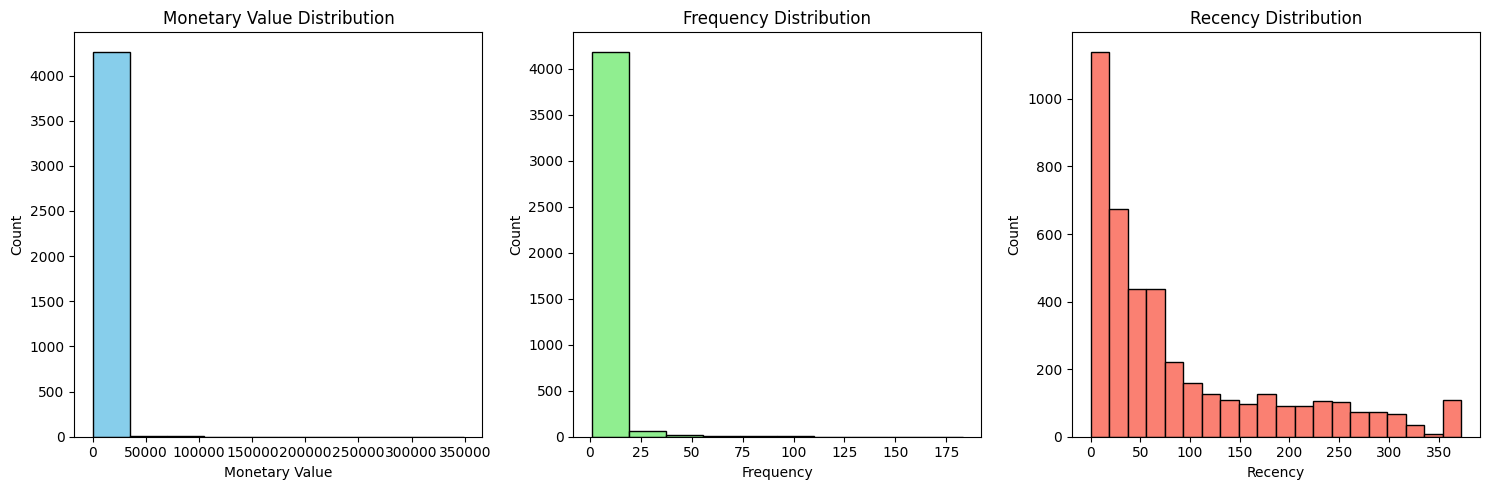

In [29]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df_2010['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df_2010['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df_2010['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Interpretation of Distributions

#### 1. Monetary Value Distribution
- **Observation**: The distribution is heavily skewed to the right, with most customers having a low monetary value.
- **Interpretation**: A small number of customers contribute to high sales, indicating that a few high-value customers drive the majority of revenue. This suggests potential for targeted marketing or personalized offers to high-value customers.

#### 2. Frequency Distribution
- **Observation**: Most customers have a low purchase frequency, with very few making frequent purchases.
- **Interpretation**: Many customers purchase infrequently, highlighting an opportunity to improve engagement or introduce loyalty programs to increase purchase frequency.

#### 3. Recency Distribution
- **Observation**: The recency distribution shows that a significant number of customers made recent purchases.
- **Interpretation**: Many customers are recently active, indicating healthy customer engagement. However, some customers haven't made a purchase in a while, suggesting a need for re-engagement strategies.

#### Overall Insight
- The data suggests a need to focus on retaining high-value customers and strategies to increase purchase frequency and re-engage inactive customers. Analyzing these metrics can inform targeted marketing campaigns and customer relationship management efforts.

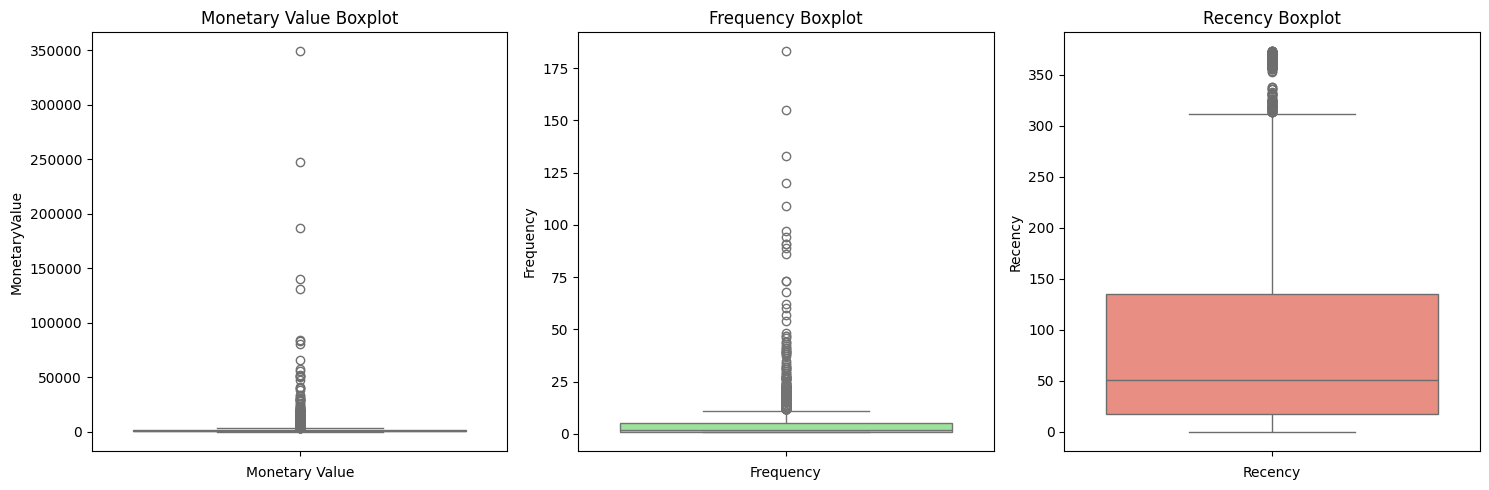

In [30]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df_2010['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df_2010['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df_2010['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

### Interpretation of Boxplots

#### 1. Monetary Value Boxplot
- **Observation**: There are many extreme outliers with exceptionally high monetary values.
- **Interpretation**: These outliers likely represent high-value customers or bulk purchases. Analyzing them separately could provide insights into high-revenue segments or unusual purchasing behaviors.

#### 2. Frequency Boxplot
- **Observation**: Similar to monetary value, there are several outliers with high purchase frequency.
- **Interpretation**: Most customers make a few purchases, while a small number make frequent purchases. Targeting these frequent customers could enhance engagement and loyalty programs.

#### 3. Recency Boxplot
- **Observation**: The distribution is skewed, with many outliers representing customers who haven't purchased in a while.
- **Interpretation**: The spread and outliers suggest varying levels of customer engagement. Recent buyers appear clustered, while those with high recency may need re-engagement efforts.

#### Overall Insight
- The boxplots highlight the presence of significant outliers, suggesting varied customer behaviors. Targeted strategies can be developed for high-value and frequent purchasers, while re-engagement efforts can focus on those with high recency values.

In [31]:
# Calculate the first quartile (Q1) of the 'MonetaryValue' column
M_Q1 = aggregated_df_2010['MonetaryValue'].quantile(0.25)

# Calculate the third quartile (Q3) of the 'MonetaryValue' column
M_Q3 = aggregated_df_2010['MonetaryValue'].quantile(0.75)

# Calculate the interquartile range (IQR)
M_IQR = M_Q3 - M_Q1

# Identify outliers in 'MonetaryValue' using the IQR method
# Outliers are detected as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
monetary_outliers_2010 = aggregated_df_2010[
    (aggregated_df_2010['MonetaryValue'] < M_Q1 - 1.5 * M_IQR) |
    (aggregated_df_2010['MonetaryValue'] > M_Q3 + 1.5 * M_IQR)
].copy()

# Display summary statistics for the identified outliers
monetary_outliers_2010.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101740,17.167849,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,1.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,8.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,12.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,18.000000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851045,19.729755,NaN,51.541004


In [32]:
monetary_outliers_2010.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
9,12357.0,11229.99,1,2010-11-16 10:05:00,23
25,12380.0,4782.84,4,2010-08-31 14:54:00,100
42,12409.0,12346.62,4,2010-10-15 10:24:00,55
48,12415.0,19468.84,4,2010-11-29 15:07:00,10
61,12431.0,4145.52,11,2010-12-01 10:03:00,8


In [33]:
# Calculate the first quartile (Q1) of the 'Frequency' column
F_Q1 = aggregated_df_2010['Frequency'].quantile(0.25)

# Calculate the third quartile (Q3) of the 'Frequency' column
F_Q3 = aggregated_df_2010['Frequency'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'Frequency'
F_IQR = F_Q3 - F_Q1

# Identify outliers in 'Frequency' using the IQR method
# Outliers are detected as values above Q3 + 1.5*IQR or below Q1 - 1.5*IQR
frequency_outliers_df_2010 = aggregated_df_2010[
    (aggregated_df_2010['Frequency'] > (F_Q3 + 1.5 * F_IQR)) |
    (aggregated_df_2010['Frequency'] < (F_Q1 - 1.5 * F_IQR))
].copy()

# Display summary statistics for the identified frequency outliers
frequency_outliers_df_2010.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,14409.714932,23.810036,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13800.000000,4331.560500,13.000000,2010-11-20 13:14:30,2.000000
50%,15465.000000,6615.770000,17.000000,2010-12-02 10:46:00,7.000000
75%,16828.500000,11692.405000,23.000000,2010-12-07 11:08:30,19.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1748.429987,31381.736785,21.932937,NaN,26.589117


In [34]:
# Filter the DataFrame to include only non-outlier entries based on monetary and frequency outliers
# Use the ~ operator to invert the boolean indexing (i.e., select where the condition is False)
non_outliers_df_2010 = aggregated_df_2010[
    (~aggregated_df_2010.index.isin(monetary_outliers_2010.index)) &
    (~aggregated_df_2010.index.isin(frequency_outliers_df_2010.index))
]

# Display summary statistics for the non-outlier entries
non_outliers_df_2010.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.000000,3809.000000,3809.000000,3809,3809.000000
mean,15376.482804,885.502197,2.863481,2010-09-03 11:16:46.516146176,97.082174
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13912.000000,279.910000,1.000000,2010-07-08 14:48:00,22.000000
50%,15389.000000,588.050000,2.000000,2010-10-12 16:25:00,58.000000
75%,16854.000000,1269.050000,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3788.210000,11.000000,2010-12-09 20:01:00,373.000000
std,1693.199806,817.672283,2.243748,NaN,98.111495


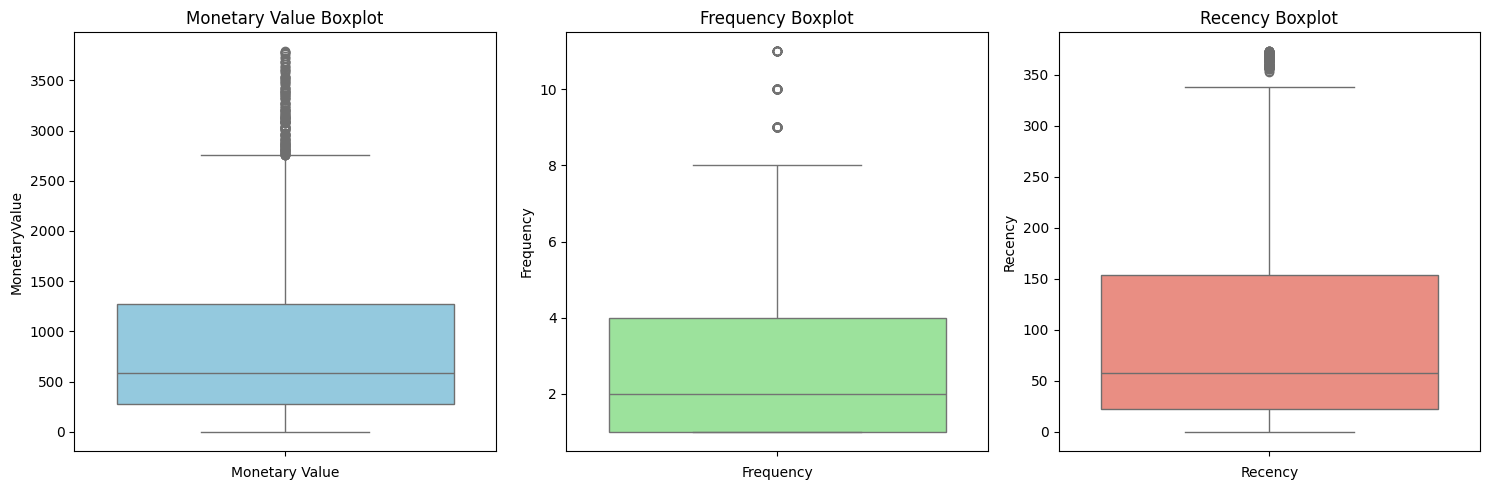

In [35]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df_2010['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df_2010['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df_2010['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

### Interpretation of Boxplots (Non-Outliers)

#### 1. Monetary Value Boxplot
- **Observation**: The distribution of monetary value shows moderate skewness with some outliers.
- **Interpretation**: While most customers cluster around the lower monetary values, there are still a few outliers. This indicates some customers continue to make notably higher-value purchases, but the range has been narrowed compared to the full dataset.

#### 2. Frequency Boxplot
- **Observation**: The frequency distribution reveals fewer outliers, with most data centralized.
- **Interpretation**: Customer purchase frequency is generally low, with outliers making more frequent purchases remaining in the dataset. This suggests typical purchase behavior with minimal deviation.

#### 3. Recency Boxplot
- **Observation**: The recency distribution is relatively spread out, with fewer outliers.
- **Interpretation**: Customers generally made recent purchases, but there are still a few who haven't purchased for an extended period. This indicates stable recent engagement with minimal extremes.

#### Overall Insight
- These boxplots of non-outliers depict a more centralized distribution, reflecting typical customer behaviors and purchase patterns after removing the extreme values. This provides a clearer picture of the main customer base and helps focus on typical engagement strategies.

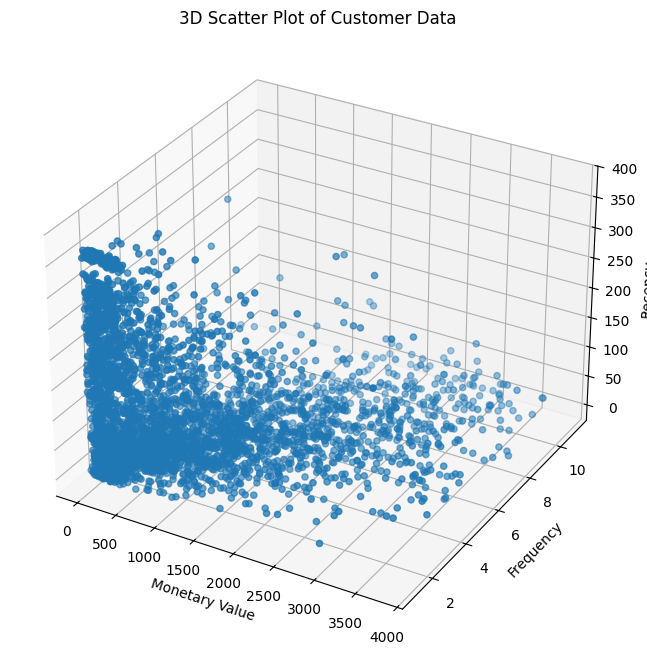

In [36]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df_2010['MonetaryValue'], non_outliers_df_2010['Frequency'], non_outliers_df_2010['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

### Interpretation of 3D Scatter Plot of Customer Data

#### Overview
- The 3D scatter plot visualizes the relationship between Monetary Value, Frequency, and Recency for each customer.

#### Insights
- **Concentration**: Many data points are clustered at lower values for Monetary Value and Frequency, with a range of Recency. This suggests most customers are newer with moderate spending and average purchase frequency.
- **Monetary Value vs. Frequency**: There's a spread along the Monetary Value and Frequency axes, showing that higher-spending customers may not always be frequent buyers, and vice versa.
- **Recency Spread**: A variety in Recency indicates that while many customers have made recent purchases, some have lapsed, represented by data points further away from zero on the Recency axis.

#### Implications
- **Customer Segmentation**: The plot helps in visualizing segments such as high-value, frequent buyers or new, low-value, infrequent purchasers.
- **Targeted Strategies**: Identifying clusters can inform tailored marketing or retention strategies, focusing on improving engagement for lower-frequency customers or re-engaging those with high Recency values.

This 3D visualization provides a holistic view of customer behavior, aiding in strategic decision-making based on customer activity patterns.

In [37]:
# Initialize the StandardScaler, which will standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Apply the scaler to the selected columns: 'MonetaryValue', 'Frequency', and 'Recency'
# This operation transforms the data to have a mean of 0 and a standard deviation of 1
scaled_data_2010 = scaler.fit_transform(non_outliers_df_2010[['MonetaryValue', 'Frequency', 'Recency']])

# Convert the scaled array back into a DataFrame, maintaining the original index and column names
scaled_data_2010 = pd.DataFrame(scaled_data_2010, index=non_outliers_df_2010.index, columns=['MonetaryValue', 'Frequency', 'Recency'])

# Display the standardized data
scaled_data_2010

,MonetaryValue,Frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700
...,...,...,...
4280,-0.298120,1.398076,-0.816344
4281,-0.579553,-0.830631,-0.316846
4282,-0.621972,-0.830631,2.017539
4283,0.441467,-0.384889,0.141876


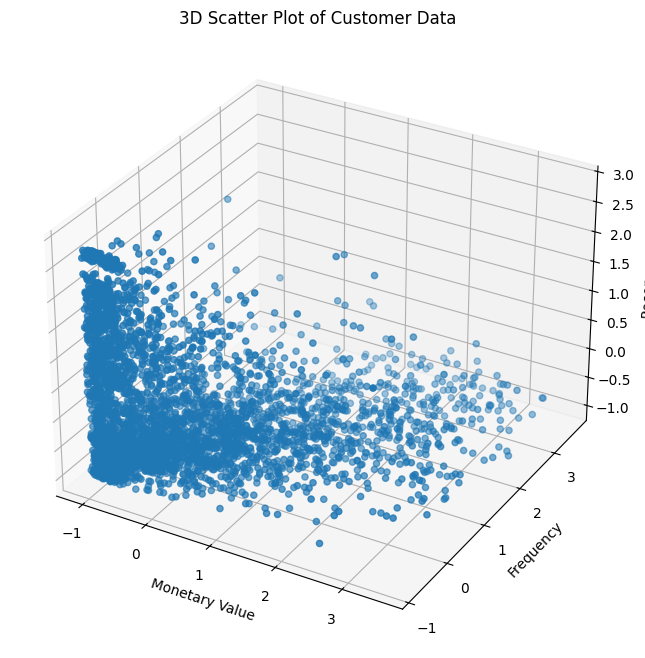

In [38]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(scaled_data_2010['MonetaryValue'], scaled_data_2010['Frequency'], scaled_data_2010['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

KMEANS CLUSTERING

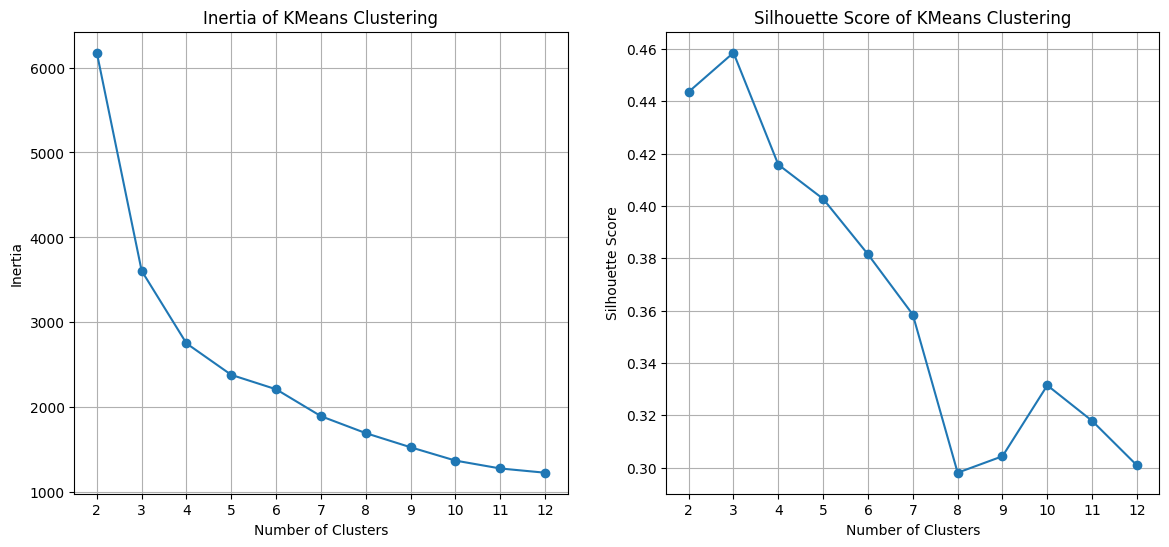

In [39]:
# Define the maximum number of clusters to test
max_k = 12

# Initialize lists to store inertia and silhouette scores for each k
inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)  # Range of k values to evaluate

# Iterate over each k value to apply KMeans clustering
for k in k_values:
    # Initialize KMeans with the current number of clusters (k), fixed random state, and max iterations
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    # Fit the KMeans model and predict cluster labels
    cluster_labels = kmeans.fit_predict(scaled_data_2010)

    # Calculate the silhouette score and append it to the list
    sil_score = silhouette_score(scaled_data_2010, cluster_labels)
    silhouette_scores.append(sil_score)

    # Append the inertia (sum of squared distances to nearest cluster center) to the list
    inertia.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(14, 6))

# Plot inertia values
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Inertia of KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score of KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

# Display the plots
plt.show()

### K-Means Clustering Evaluation

#### Inertia Plot
- **Description**: The inertia plot shows the sum of squared distances from each point to its closest cluster center as the number of clusters increases.
- **Interpretation**: The "elbow" method suggests an optimal clustering point where the rate of decrease sharply changes. In this plot, the elbow is identified around 4 clusters, indicating a reasonable point to stop adding clusters due to diminishing returns in improving clustering compactness.

#### Silhouette Score Plot
- **Description**: The silhouette score measures how well-separated the clusters are, ranging from -1 to 1. Higher scores indicate better-defined clusters.
- **Interpretation**: The plot shows that silhouette scores are fairly strong at 3 clusters, but given the elbow at 4 clusters in the inertia plot, choosing 4 clusters still provides a good balance between compactness and separation.

#### Conclusion
- **Cluster Selection**: Based on the analysis, 4 clusters have been chosen to effectively balance compactness and separation. This allows for meaningful segmentation with manageable complexity.
- **Implications**: Selecting 4 clusters supports effective customer segmentation, enabling targeted marketing strategies and providing insights into customer behavior patterns.

In [40]:
# Initialize the KMeans algorithm with 4 clusters, a specified random state for reproducibility, and a maximum of 1000 iterations
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

# Fit the KMeans model to the scaled data and predict cluster labels for each data point
cluster_labels = kmeans.fit_predict(scaled_data_2010)

# Output the cluster labels for each data point
cluster_labels

array([1, 0, 2, ..., 1, 0, 0], shape=(3809,), dtype=int32)

In [41]:
# Assign the cluster labels to a new column 'Cluster' in the non_outliers_df_2010 DataFrame
non_outliers_df_2010["Cluster"] = cluster_labels

non_outliers_df_2010.head()

/var/folders/cl/y3npqsz9383g_6r1rjj5338r0000gn/T/ipykernel_78714/3748324006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df_2010["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2


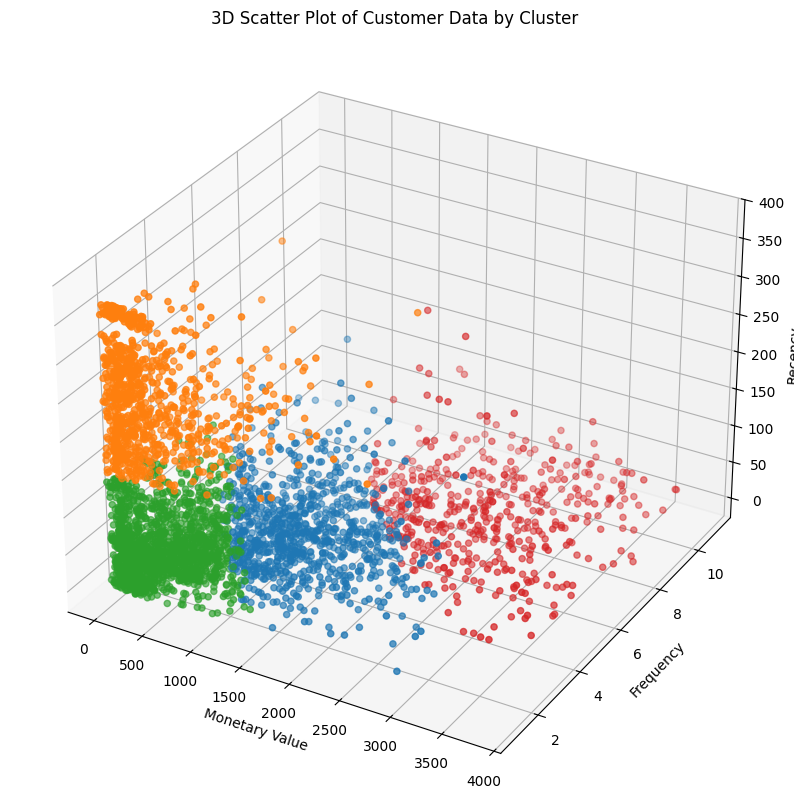

In [42]:
# Define a color mapping for each cluster using a dictionary
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

# Map the cluster numbers to their respective colors for visualization
colors = non_outliers_df_2010['Cluster'].map(cluster_colors)

# Create a 3D scatter plot with specified figure size
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Plot the data points with colors based on their cluster membership
scatter = ax.scatter(non_outliers_df_2010['MonetaryValue'], 
                     non_outliers_df_2010['Frequency'], 
                     non_outliers_df_2010['Recency'], 
                     c=colors,  # Apply mapped colors to each point
                     marker='o')

# Label the axes for clear interpretation of the plot
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

# Set the title of the plot for context
ax.set_title('3D Scatter Plot of Customer Data by Cluster')

# Display the plot
plt.show()

### 3D Scatter Plot of Customer Data by Cluster

#### Overview
The 3D scatter plot visualizes customer segmentation, clustering data points based on Monetary Value, Frequency, and Recency. Each cluster is represented by a distinct color to highlight different customer groups.

#### Interpretation
- **Cluster Colors**:
  - **Blue**: Represents one customer segment with specific purchasing behaviors.
  - **Orange**: Another distinct group, indicating varying patterns in recency, frequency, or spending.
  - **Green**: Suggests a segment characterized by unique activity in one or more dimensions.
  - **Red**: Highlights a final group, offering insight into a separated behavior set.
  
- **Dimension Analysis**:
  - **Monetary Value**: Spread across the plot, indicating variation in spending across clusters.
  - **Frequency and Recency**: Clusters are distributed, showing differences in customer engagement and purchase patterns.

#### Implications
- **Segmentation Strategy**: The visualization aids in understanding which segments require targeted marketing efforts.
- **Cluster Characteristics**: Examination of cluster attributes can help design personalized promotions and improve customer retention based on identified behaviors.

This plot provides a visual foundation for targeted customer analysis, allowing businesses to tailor strategies to distinct customer groups.

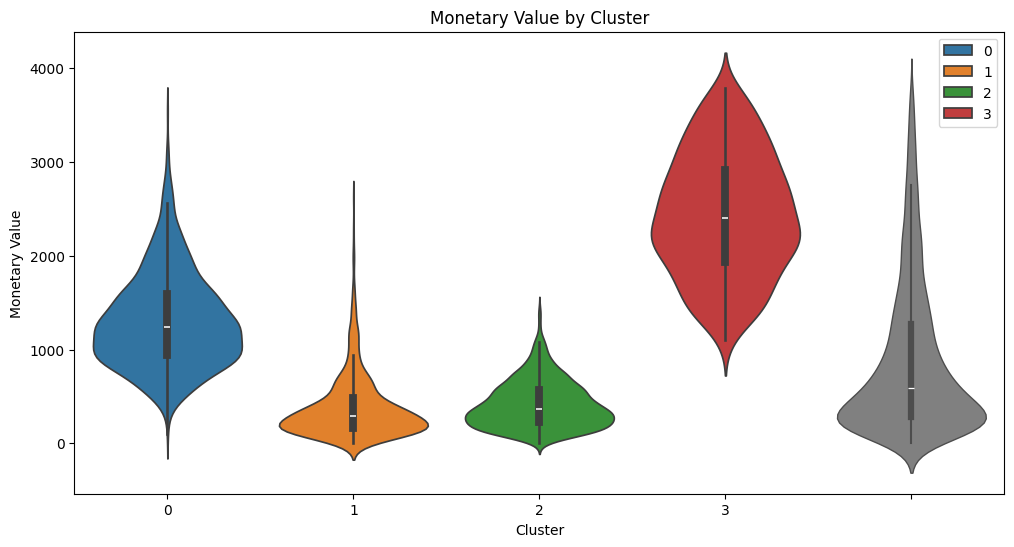

In [43]:
plt.figure(figsize=(12, 6))  # Set figure size

# Cluster-specific violin plot (colored by cluster)
sns.violinplot(x=non_outliers_df_2010['Cluster'], 
               y=non_outliers_df_2010['MonetaryValue'], 
               palette=cluster_colors,
               hue=non_outliers_df_2010['Cluster'])  # Color by cluster
sns.violinplot(y=non_outliers_df_2010['MonetaryValue'], color='gray', linewidth=1.0)

# Titles and labels
plt.title('Monetary Value by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monetary Value')

# Show plot
plt.show()

### Violin Plot of Monetary Value by Cluster

#### Overview
This violin plot displays the distribution of Monetary Value across different customer clusters, illustrating the variations in spending within each group.

#### Interpretation
- **Cluster 0 (Blue)**: A mid-range distribution with moderate spending, indicating balanced expenditures among customers in this cluster.
- **Cluster 1 (Orange)**: Shows a narrower distribution with lower monetary values, suggesting smaller expenditures compared to other clusters.
- **Cluster 2 (Green)**: Similar to Cluster 1, this group also has a tight spending range, with some variation in the middle.
- **Cluster 3 (Red)**: Exhibits the widest range, indicating diverse spending. Customers in this cluster tend to have higher expenditures.
- **Cluster 4 (Grey)**: Reflects varied spending patterns, with a wide spread around a central tendency.

#### Implications
- **Targeted Marketing**: Understanding spending patterns can help tailor marketing strategies for each cluster. For instance, personalized promotions could enhance engagement in Clusters 3 and 4.
- **Customer Insights**: Insights into monetary distribution assist in identifying high-value segments and opportunities for increased engagement.

By visualizing spending behavior, businesses can refine customer relationship and marketing tactics to better serve each segment's needs.

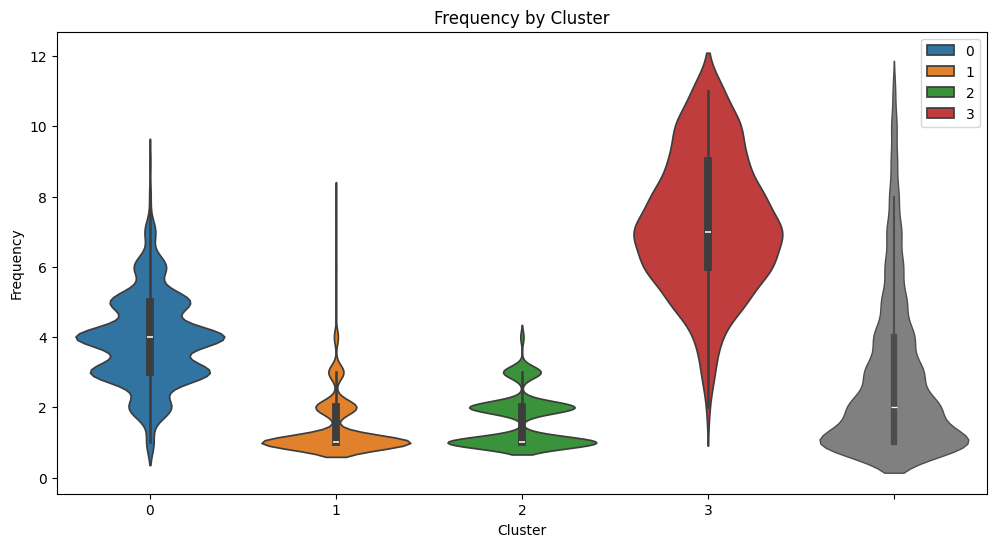

In [44]:
plt.figure(figsize=(12, 6))  # Set figure size

# Cluster-specific violin plot (colored by cluster)
sns.violinplot(x=non_outliers_df_2010['Cluster'], 
               y=non_outliers_df_2010['Frequency'], 
               palette=cluster_colors,
               hue=non_outliers_df_2010['Cluster'])  # Color by cluster
sns.violinplot(y=non_outliers_df_2010['Frequency'], color='gray', linewidth=1.0)

# Titles and labels
plt.title('Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

# Show plot
plt.show()

### Violin Plot of Frequency by Cluster

#### Overview
This violin plot visualizes the distribution of purchase Frequency across different customer clusters, highlighting how often customers make purchases.

#### Interpretation
- **Cluster 0 (Blue)**: Displays a more frequent purchasing pattern, with a wide range indicating varied customer behaviors.
- **Cluster 1 (Orange)**: Shows a concentrated lower frequency, suggesting infrequent purchases.
- **Cluster 2 (Green)**: Similar to Cluster 1, with low purchase frequency and little variation.
- **Cluster 3 (Red)**: Exhibits the highest and widest range of frequency, indicating regular and diverse purchasing behaviors.
- **Cluster 4 (Grey)**: Reflects moderate frequency with some variation, showing consistent engagement.

#### Implications
- **Engagement Strategies**: Insights into purchase frequency can guide engagement initiatives, focusing on increasing purchase regularity in Clusters 1 and 2.
- **Customer Retention**: Identifying clusters with high purchase frequency, like Cluster 3, can help design loyalty programs to sustain their engagement.

This visualization provides valuable insights into customer purchase behaviors, allowing for tailored strategies to enhance engagement and retention.

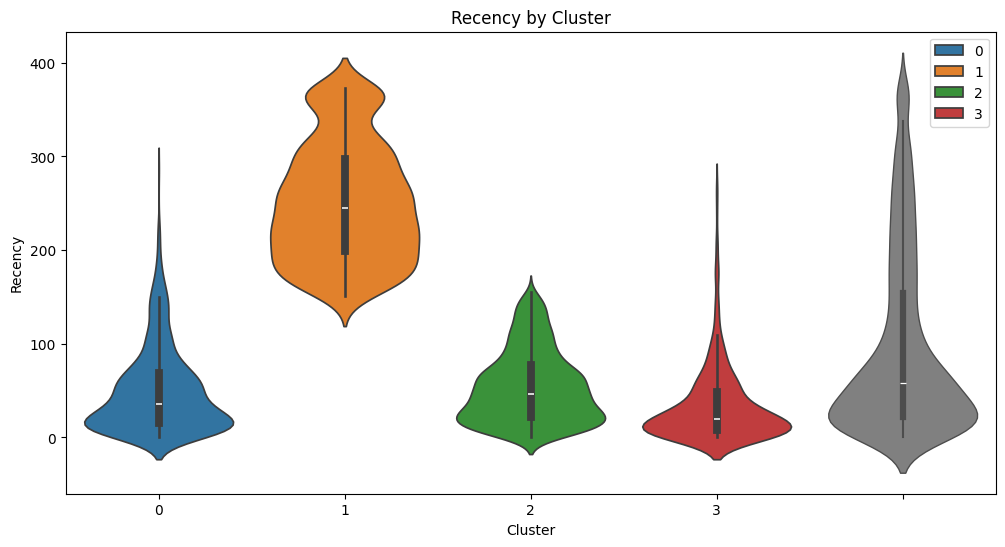

In [45]:
plt.figure(figsize=(12, 6))  # Set figure size

# Cluster-specific violin plot (colored by cluster)
sns.violinplot(x=non_outliers_df_2010['Cluster'], 
               y=non_outliers_df_2010['Recency'], 
               palette=cluster_colors,
               hue=non_outliers_df_2010['Cluster'])  # Color by cluster
sns.violinplot(y=non_outliers_df_2010['Recency'], color='gray', linewidth=1.0)


# Titles and labels
plt.title('Recency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency')

# Show plot
plt.show()

### Violin Plot of Recency by Cluster

#### Overview
This violin plot illustrates the distribution of Recency across different customer clusters, shedding light on when customers last made a purchase.

#### Interpretation
- **Cluster 0 (Blue)**: Shows moderate recency values, indicating a mix of recent and less recent purchases.
- **Cluster 1 (Orange)**: Displays the broadest range of recency, suggesting variable purchasing timelines with many not having engaged recently.
- **Cluster 2 (Green)**: Represents lower recency values, highlighting recent activity among these customers.
- **Cluster 3 (Red)**: Similar to Cluster 2, this group also indicates recent engagement.
- **Cluster 4 (Grey)**: Exhibits a wide spread with a central tendency, reflecting diverse engagement levels.

#### Implications
- **Re-engagement Efforts**: Cluster 1 may benefit from re-engagement strategies focused on revitalizing interest and reducing time since the last purchase.
- **Consistent Engagement**: Clusters 2 and 3 demonstrate active customer retention or recent attraction, suggesting successful engagement strategies.

This visualization aids in understanding customer engagement patterns, highlighting areas for reactivation and strategies to sustain active participation.

### Cluster Analysis and Strategic Actions

#### Cluster 0 (Blue): "Retain"
- **Rationale**: High-value customers who purchase regularly but not always recently. Retention is essential to maintain their loyalty and spending.
- **Action**: Implement loyalty programs, personalized offers, and regular engagement to ensure continued activity.

#### Cluster 1 (Orange): "Re-Engage"
- **Rationale**: Lower-value, infrequent buyers who haven’t purchased recently. The goal is to bring them back into active purchasing.
- **Action**: Use targeted marketing campaigns, special discounts, or reminders to encourage return purchases.

#### Cluster 2 (Green): "Nurture"
- **Rationale**: Least active and lowest-value customers, but they have made recent purchases. Potential for growth through increased engagement.
- **Action**: Build relationships, provide excellent customer service, and offer incentives to encourage more frequent purchases.

#### Cluster 3 (Red): "Reward"
- **Rationale**: High-value, frequent buyers who are actively purchasing. Rewarding their loyalty is key to maintaining engagement.
- **Action**: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

### Summary of Cluster Names:
- **Cluster 0 (Blue)**: "Retain"
- **Cluster 1 (Orange)**: "Re-Engage"
- **Cluster 2 (Green)**: "Nurture"
- **Cluster 3 (Red)**: "Reward"

In [46]:
# Identify indices where both monetary and frequency outliers overlap
overlap_indices = monetary_outliers_2010.index.intersection(frequency_outliers_df_2010.index)

# Separate outliers into three categories:
# 1. Monetary outliers only, excluding overlap
monetary_only_outliers = monetary_outliers_2010.drop(overlap_indices)

# 2. Frequency outliers only, excluding overlap
frequency_only_outliers = frequency_outliers_df_2010.drop(overlap_indices)

# 3. Outliers in both monetary and frequency, identified by overlap
monetary_and_frequency_outliers = monetary_outliers_2010.loc[overlap_indices]

# Assign unique cluster labels for categorization:
# -1 for monetary-only outliers
monetary_only_outliers["Cluster"] = -1

# -2 for frequency-only outliers
frequency_only_outliers["Cluster"] = -2

# -3 for outliers in both categories
monetary_and_frequency_outliers["Cluster"] = -3

# Combine all categorized outliers into a single DataFrame
outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

# Display the combined DataFrame of outlier clusters
outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.0,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.0,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.0,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.0,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.0,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


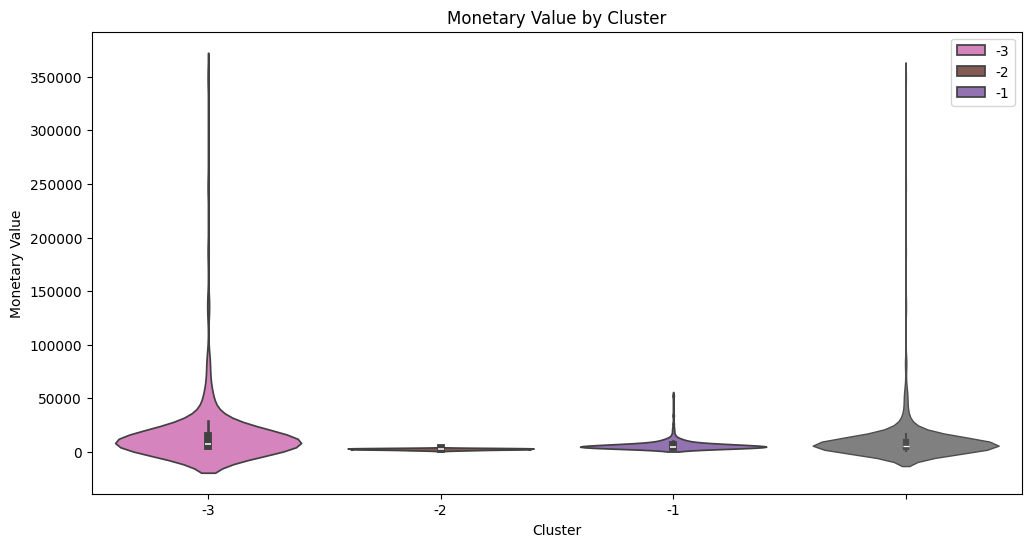

In [47]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 6))

sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.show()

### Monetary Value by Outlier Cluster

#### Overview
This violin plot displays the distribution of Monetary Value for different outlier clusters, offering insights into spending-related anomalies.

#### Interpretation
- **Cluster -1**: Monetary-only outliers, showing typical ranges with some high spenders indicating significant outliers in expenditures.
- **Cluster -2**: Frequency-only outliers, depicting minimal variation in spending, primarily identified by frequent purchases rather than high expenditure.
- **Cluster -3**: Outliers in both monetary value and frequency, showing substantial differences in spending. This cluster reflects the most extreme spending behaviors.

#### Implications
- **Targeting Strategies**: Understanding spending patterns helps tailor strategies for extreme cases, such as personalized offers or premium services for high spenders.
- **Risk Management**: Identifying these outliers aids in managing risks associated with spending anomalies and ensures strategic resources are well-allocated.

This visualization supports the exploration and characterization of atypical customer segments, providing a nuanced understanding of outlier groups.

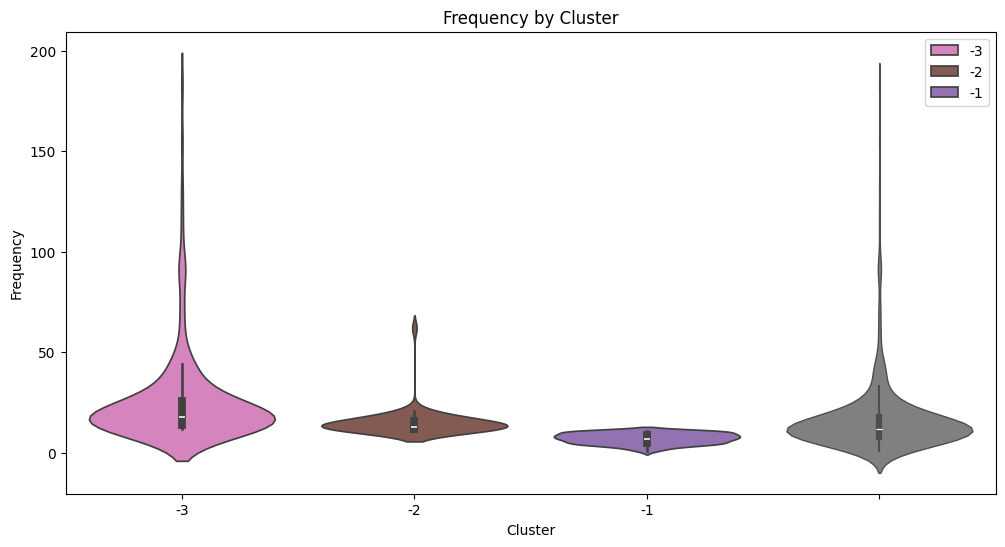

In [48]:
plt.figure(figsize=(12, 6))

sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.show()


### Frequency by Outlier Cluster

#### Overview
This violin plot illustrates the distribution of purchase Frequency across different outlier clusters, highlighting anomalies in purchasing regularity.

#### Interpretation
- **Cluster -1**: Monetary-only outliers showing low variability in frequency, indicating standard buying patterns despite irregular spending.
- **Cluster -2**: Frequency-only outliers with significant variation, reflecting unusual purchase regularity not mirrored in spending amounts.
- **Cluster -3**: Outliers in both frequency and monetary value, exhibiting broad frequency ranges and extreme purchasing behaviors.

#### Implications
- **Engagement Tactics**: Understanding frequency patterns helps tailor interventions, such as personalized communications for high-frequency anomalies.
- **Behavioral Analysis**: Isolating high-frequency outliers distinct from monetary anomalies allows for focused analysis on unusual engagement patterns.

This visualization aids in understanding customer purchase frequency outliers, allowing for strategic focus on irregular engagement patterns.

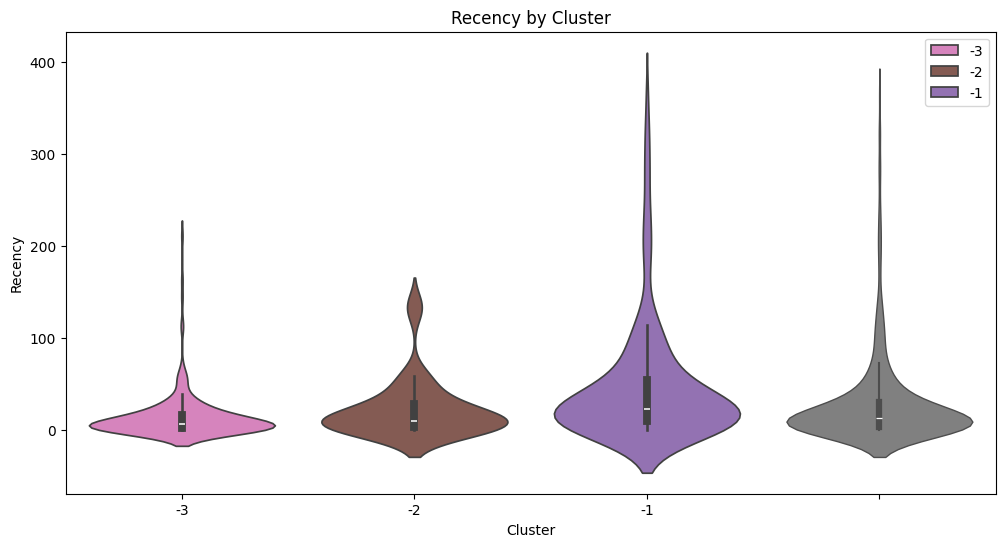

In [49]:
plt.figure(figsize=(12, 6))

sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.show()

### Recency by Outlier Cluster

#### Overview
This violin plot displays the distribution of Recency across different outlier clusters, highlighting anomalies in customer purchase recency.

#### Interpretation
- **Cluster -1**: Monetary-only outliers with a wide range of recency, indicating varied times since their last purchase among high spenders.
- **Cluster -2**: Frequency-only outliers exhibit a focused recency distribution, suggesting recent or regularly spaced purchases.
- **Cluster -3**: Outliers in both frequency and monetary value show a diverse range of recency, reflecting varied purchasing timelines.

#### Implications
- **Engagement Optimization**: Understanding recency patterns can inform reactivation campaigns. Tailored re-engagement strategies may benefit Cluster -1 due to their varied recency.
- **Retention Focus**: Identifying and managing outlier clusters in recency ensures timely interventions to maintain customer relationships.

This visualization aids in identifying irregularities in customer recency, guiding strategic engagement and retention efforts.

### Outlier Cluster Strategies

#### Cluster -1 (Monetary Outliers) - **PAMPER**
- **Characteristics**: High spenders with large but infrequent purchases.
- **Potential Strategy**: Enhance loyalty through personalized offers and luxury services tailored to their high spending capacity. Consider exclusive access and premium customer service to maintain engagement.

#### Cluster -2 (Frequency Outliers) - **UPSELL**
- **Characteristics**: Frequent buyers who have lower spending per purchase.
- **Potential Strategy**: Leverage their frequent engagement by offering loyalty programs, bundle deals, or upselling opportunities. Encourage higher spending through incentives for larger purchases and exclusive member benefits.

#### Cluster -3 (Monetary & Frequency Outliers) - **DELIGHT**
- **Characteristics**: Top-tier customers with both high spending and frequent purchases.
- **Potential Strategy**: Implement VIP programs and offer exclusive deals to recognize and retain their loyalty. Provide personalized experiences that cater to their preferences, ensuring they feel valued and motivated to continue their engagement.

These strategic approaches, tailored to the specific characteristics of each outlier cluster, aim to optimize customer relationships and drive continued success.

In [50]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [51]:
full_clustering_df = pd.concat([non_outliers_df_2010, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


In [52]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT


/var/folders/cl/y3npqsz9383g_6r1rjj5338r0000gn/T/ipykernel_78714/1237300352.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis')


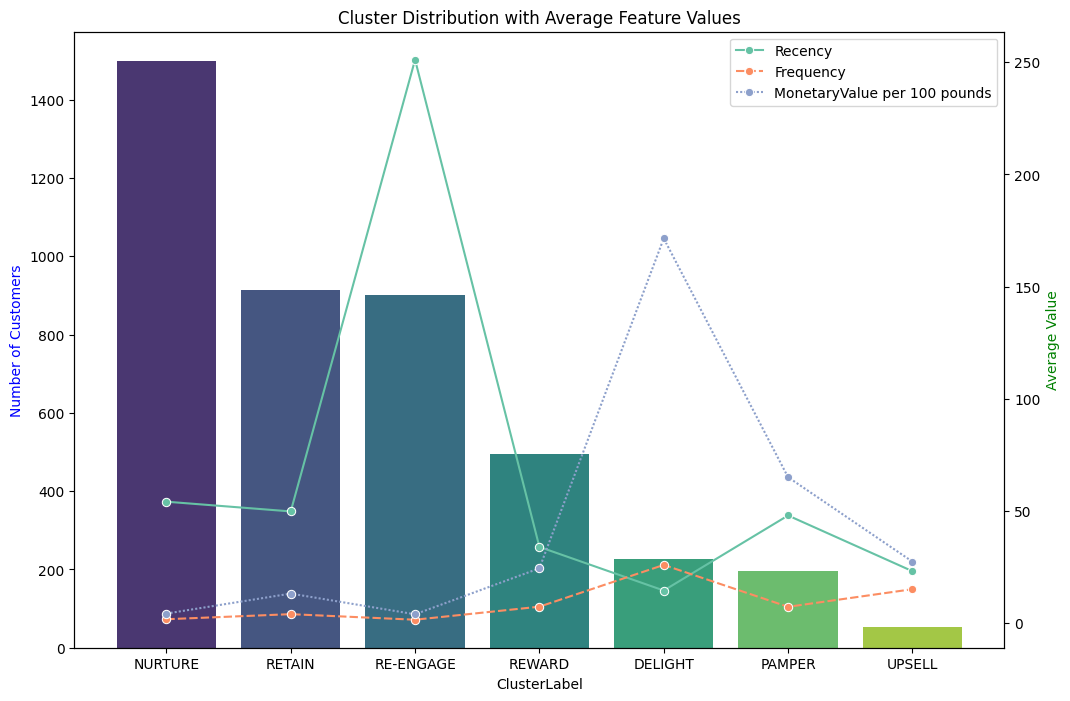

In [53]:
# Count the number of customers in each cluster
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()

# Calculate monetary value in hundreds for easier scaling and readability
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00

# Compute the mean of 'Recency', 'Frequency', and 'MonetaryValue per 100 pounds' for each cluster
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

# Create a figure and a bar plot for cluster distribution
fig, ax1 = plt.subplots(figsize=(12, 8))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis')
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

# Create a second y-axis to plot the average feature values for each cluster
ax2 = ax1.twinx()
sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

# Display the combined plot
plt.show()

### Cluster Distribution with Average Feature Values

#### Overview
This final visualization presents a comprehensive view of cluster distributions alongside their average feature values, combining insights from the entire analysis.

#### Interpretation
- **Bar Plot (Left Y-axis)**:
  - Illustrates the number of customers within each cluster, providing an overview of cluster size distribution.
  - The "NURTURE" cluster has the largest customer base, while "UPSELL" contains fewer members.

- **Line Plot (Right Y-axis)**:
  - Depicts the average values of Recency, Frequency, and MonetaryValue (per 100 pounds) for each cluster.
  - "DELIGHT" shows the highest average Recency, indicating occasional but significant engagement.
  - "REWARD" and "RETAIN" maintain moderate Frequency and MonetaryValue, reflecting balanced purchasing behavior.

#### Implications
- **Strategic Insights**: 
  - Clusters like "NURTURE" and "REWARD" suggest opportunities for enhanced engagement through tailored programs.
  - "DELIGHT" requires focused attention with VIP treatments, considering their high Recency but valuable contributions.

- **Business Impact**:
  - Understanding these dynamics aids in allocating resources efficiently, ensuring that customer engagement efforts align with specific cluster characteristics and potential.

This visualization encapsulates the findings from the clustering approach, showcasing how customer segmentation can drive targeted actions and strategic planning.